<a href="https://colab.research.google.com/github/nowakdoma/ComputerVision_PUT/blob/main/6_Workbook_Rezpozytoria_danych_i_modeli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Widzenie komputerowe - Laboratoria nr 12

## Opis laboratoriów

- zapoznanie z popularnymi zbiorami danych,
- zapoznanie z repozytoriami zbiorów danych,
- zapoznanie z popularnymi modelami neuronowymi,
- zapoznanie z repozytoriami modeli neuronowych

## Funkcje pomocnicze

### Niezbędne biblioteki


In [ ]:
!pip install -q tfds-nightly
!pip install -q tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [ ]:
!pip install numpy==1.26
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import numpy as np
import cv2
import PIL

from pprint import pprint

In [ ]:
!wget -O lena_std.tif http://www.lenna.org/lena_std.tif
!wget -O graf.png https://github.com/opencv/opencv/raw/master/samples/data/graf1.png

--2025-06-12 21:19:19--  http://www.lenna.org/lena_std.tif
Resolving www.lenna.org (www.lenna.org)... 107.180.37.106
Connecting to www.lenna.org (www.lenna.org)|107.180.37.106|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786572 (768K) [image/tiff]
Saving to: ‘lena_std.tif’

lena_std.tif        100%[===================>] 768.14K  2.41MB/s    in 0.3s    

2025-06-12 21:19:19 (2.41 MB/s) - ‘lena_std.tif’ saved [786572/786572]

--2025-06-12 21:19:19--  https://github.com/opencv/opencv/raw/master/samples/data/graf1.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/samples/data/graf1.png [following]
--2025-06-12 21:19:20--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/graf1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.

### Wizualizacja



Skrypt do wyżwietlania obrazów BGR oraz Grayscale.

In [ ]:
def imshow(a):
  a = a.clip(0, 255).astype('uint8')
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

# Zbiory danych

Najważniejszym narzędziem podczas prowadzenia prac zarówno badawczo-rozwojowych jak i deweloperskich jest dobrze zdefiniowany zbiór danych. Modele neuronowe są bardzo czułe na wszelkie niespójności oraz wady zawarte w danych, dlatego takie zbiory danych jak MNIST czy CIFAR są wciąż bardzo popularne.

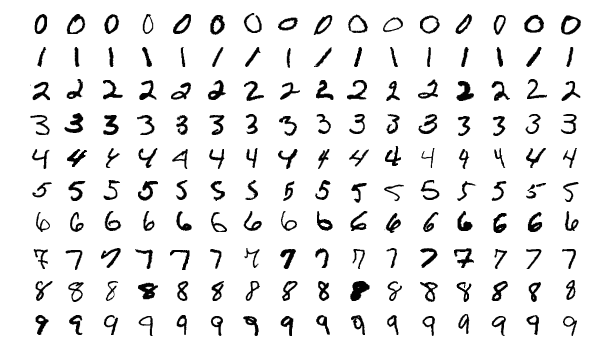

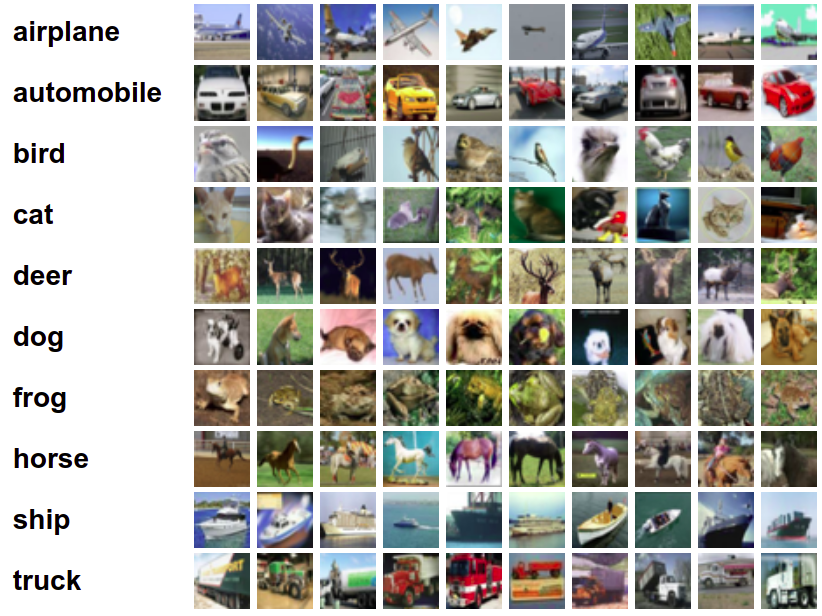

Mimo ich prostoty, zbiory te są bardzo dobrze zdefiniowane, zarówno pod względem liczebności danych jak i ich formatu. Co więcej, autorzy zadbali również o liczebność i zróżnicowanie danych względem każdej z klasy danych osobno.

**Powyższe dane bardzo często stosuje się do prototypowania modeli neuronowych lub podczas prac bazowych, dotyczących nowych zagadnień ale również do weryfikacji założeń badawczych.**

Pomimo olbrzymiej przydatności tych zbiorów danych zaistniała potrzeba na nowe, bardziej wyrafinowane i skomplikowane dane. Dane, dzięki którym możliwe będzie rozwiązanie kolejnych problemów naukowych. Ponieważ możliwości sieci neuronowych wraz z połączeniem wysokiej wydajności sprzętowej (np. GPU i TPU) pozwalają osiągać wyniki deklasujące poprzednie rozwiązania w większości dziedzin informatycznych ich popularność gwałtownie wzrosła. Wraz z popularnością na sieci neuronowe wzrósł popyt na zbiory danych i obecnie możemy zauważyć trend polegający na prześciganiu się zarówno uniwersytetów jak i firm prywatnych czy instytucji państwowych w przytotowywaniu własnych zbiorów danych, które następnie są udostępniane społeczności akademickiej (zazwyczaj za darmo).

Ze względu na olbrzymie zainteresowanie zbiorami danych powstało wiele prób zunifikowania dostępu do nich. W dostępie do danych przoduje firma Google, która wykorzystuje możliwości przechowywania i przetwarzania masywnych danych na swoich serwerach. Dodatkowo, posiadając najpopularniejszą wyszukiwarkę informacji na świecie z łatwością może zbierać i przytotowywać kolejne zbiory danych.

Do ważniejszych repozytoriów danych obecnie należą:
- **TensorFlow Datasets** - platforma udostępniona przez Google zawierająca bibliotekę w Pythonie dostosowaną do formatu przetwarzania obecnego w bibliotece TensorFlow. Biblioteka łączy się z repozytoriami na serwerach Google i pozwala na automatyczne pobieranie danych do środowiska lokalnego. Platforma TensorFlow Datasets pozwala również na publikowanie własnych zbiorów danych.
- **Google Research Datasets** - zestaw i opracowanie popularnych zbiórów danych. Jest to jedynie strona, na której zostały zaprezentowane najczęściej wykorzystywane zbiory danych przez środowisko akademickie.
- **Google Dataset Search** - systematyczne podejście do poszukiwania danych zaprezentowane przez firmę Google. Jest to wyszukiwarka zbiorów na podstawie słów kluczowych, która przeszukuje różne repozytoria w celu znalezienia odpowiednich danych.
- usługi cloudowe - ze względu na popularyzację przetwarzania w chmurze, firmy dostarczające tę funkcjonalność pozwalają (lub same przygotowują) zbiory danych juz dostępne w usłudze cloudowej. Do popularniejszych należą **[Open Data on AWS](https://registry.opendata.aws/)**, **[Google Cloud Platform](https://console.cloud.google.com/marketplace/browse?filter=solution-type:dataset&pli=1)** i **[Azure Open Datasets](https://azure.microsoft.com/pl-pl/services/open-datasets/)**.

## TensorFlow Datasets

TensorFlow Datasets jest to biblioteka historycznie wydzielona z bilbioteki TensorFlow, która zawiera API dotyczące pobierania i przetwarzania zbiorów danych. Biblioteka zawiera implementacje pozwalającą na pobieranie gotowych zbiorów danych.

[Lista obecnie dostępnych zbiorów.](https://www.tensorflow.org/datasets/catalog/overview)

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asimov_dilemmas_auto_val',
 'asimov_dilemmas_scifi_train',
 'asimov_dilemmas_scifi_val',
 'asimov_injury_val',
 'asimov_multimodal_auto_val',
 'asimov_multimodal_manual_val',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 '

Biblioteka posiada wiele różnych interfejsów pozwalających na pobranie zbiorów danych.

Za pomocą command line:

In [ ]:
!tfds build mnist
!tfds build cifar10

2025-06-12 21:19:24.804993: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749763164.824421    3140 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749763164.830332    3140 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/usr/local/bin/tfds", line 5, in <module>
    from tensorflow_datasets.scripts.cli.main import launch_cli
  File "/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/scripts/cli/main.py", line 37, in <module>
    from tensorflow_datasets.scripts.cli import convert_format
  File "/usr/local/lib/python3.11/dist-packages/tensorflow_datasets/scripts/cli/convert_format.py", line 33, in <m

Za pomocą funkcji pomocniczej **tfds.load**:

In [ ]:
train_ds_mnist = tfds.load('mnist', split='train', shuffle_files=True)

print(train_ds_mnist)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

In [ ]:
_train_ds_mnist = train_ds_mnist \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(4)

data = next(iter(_train_ds_mnist))

print(data['image'].shape, data['label'].shape)

In [ ]:
images = data['image'].numpy()

imshow(np.concatenate(images, 1))

''Ręcznie'' korzystając z funkcjonalności bilbioteki - **builder**.

In [ ]:
builder = tfds.builder('mnist')
builder.download_and_prepare()

train_ds_mnist = builder.as_dataset(split='train', shuffle_files=True)

print(train_ds_mnist)

In [ ]:
_train_ds_mnist = train_ds_mnist \
  .shuffle(1024) \
  .batch(32) \
  .prefetch(4)

data = next(iter(_train_ds_mnist))

print(data['image'].shape, data['label'].shape)

In [ ]:
images = data['image'].numpy()

imshow(np.concatenate(images, 1))

### Funkcje pomocnicze

Biblioteka TFDS zawiera również funkcje pomocnicz pozwalające na analizę i wyświetlanie danych.

In [ ]:
train_ds_mnist, info = tfds.load('mnist', split='train', with_info=True)

print(info)

In [ ]:
fig = tfds.show_examples(train_ds_mnist, info)

In [ ]:
tfds.as_dataframe(train_ds_mnist.take(4), info)

# Modele

Codziennie publikowane są artykuły opisujące nowe architektury neuronowe lub ich usprawnienia. Dodatkowo, modele neuronowe są zazwyczaj tworzone przez społeczność akademicką, a charakterystyka modeli często nie pozwala na unifikację ich zapisu. Powoduje to problem z udostępnianiem modeli (a nawet i weryfikacją wyników).



## TensorFlow Hub

Jednym z rozwiązań jest sprowadzenie modelu neuronowego do tej samej postaci, która może być przetwarzana przez jedno API. Korzystając z TensorFlow możliwa jest transformacja modelu przetwarzania do tzn. Graph API. Jest to graf zależności pomiędzy zdefiniowanymi operacjami (dodawanie, mnożenie, itp.), który może być następnie zoptymalizowany oraz, co jest bardzo ważne, model taki jest niezależny od wcześniejszej implementacji (t.j. postać symboliczna, np. w Keraz, transformowana jest do postaci grafu zależności). Tak utworzony model można z łatwością przechowywać, zachowując informację jedynie o interfejsie wejścia i wyjścia.

Podobnie jak w przypadku zbiorów danych, Google stworzyło platformę na której można udostępniać swoje modele (pretrenowane!). Platforma [TensorFlow Hub](https://tfhub.dev/) pozwala na łatwe pobranie istniejących już modeli i ponowne ich wykorzystanie.

In [ ]:
lena = cv2.imread('./lena_std.tif', cv2.IMREAD_COLOR)
imshow(lena)

In [ ]:
graf = cv2.imread('./graf.png', cv2.IMREAD_COLOR)
imshow(graf)

In [ ]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
print(hub_module)

In [ ]:
print(len(hub_module.variables), '\n', hub_module.variables[0])

In [ ]:
lena_tf = tf.constant(lena.astype(np.float32)[np.newaxis, ...] / 255.)
graf_tf = tf.constant(graf.astype(np.float32)[np.newaxis, ...] / 255.)

graf_tf = tf.image.resize(graf_tf, (256, 256))

print(lena_tf.shape, graf_tf.shape)


In [ ]:
lena_stylized = hub_module(lena_tf, graf_tf)[0][0].numpy()
imshow(lena_stylized * 255)

## TensorFlow Model Garden

Innym rozwiązaniem jest wykorzystanie gotowych implementacji innych autorów. Oprócz przeszukiwania referencji do publicznych repozytoriów zawartych w artykułach naukowych lub blogach programistycznych można również spojrzeć na oficjalne repozytorium biblioteki TensorFlow.

Można w niej znaleźć implementacje popularnych modeli neuronowych wraz z instrukcją dotyczącą odtworzenia wyników z artykułów. Podrepozytorium biblioteki TensorFlow nazywa się [TensorFlow Model Garden](https://github.com/tensorflow/models).

W skład repozytorium wchodzą zarówno oficjalne implementacje modeli jak i te, które są wciąż rozwijane w ramach badań naukowych.

Wśród oficjalnych i przetestowanych implementacji znajdziemy 3 główne gałęzie modeli:
- **wizyjne**,
- przetwarzania języka naturalnego,
- rekomendacyjne

In [ ]:
!git clone https://github.com/tensorflow/models.git

In [ ]:
import os
os.environ['PYTHONPATH'] += ":/content/models"

In [ ]:
!python3 /content/models/official/vision/image_classification/mnist_main.py \
  --model_dir=/content/results/mnist \
  --data_dir=/content/data/mnist \
  --train_epochs=10 \
  --distribution_strategy=one_device \
  --num_gpus=1 \
  --download

# Zadanie 1

Korzystając z TensorFlow Datasets oraz TensorFlow Hub zaprezentuj działanie dowolnie wybranej sieci neuronowej na danym zbiorze danych. W szczególności:
- wykorzystaj inny zbiór danych niż dotychczas poznane na zajęciach (nie korzystaj z takich zbiorów jak mnist, cifar, caltech),
- przedstaw dane wejściowe korzystając z funkcji pomicniczych tfds lub ręcznie (pokazać kilka przykładów wejście - wyjście),
- pobierz odpowiedni model z TensorFlow Hub (odpowiedni oznacza, że inferencja modelu powinna działać dla wybranego zbioru danych; **uwaga: inferencja nie musi być poprawna w sensie weryfikacji wyników, choć warto wybrać model, który będzie działał dla danego zbioru danych**),
- zaprezentuj wyniki działania modelu na paru próbkach ze zbioru danych (np. dla detekcji obiektów załadować pare losowych obrazów, wykonać inferencję modelu i zaprezentować wyniki detekcji),

### Ładowanie danych i pokazanie danych

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

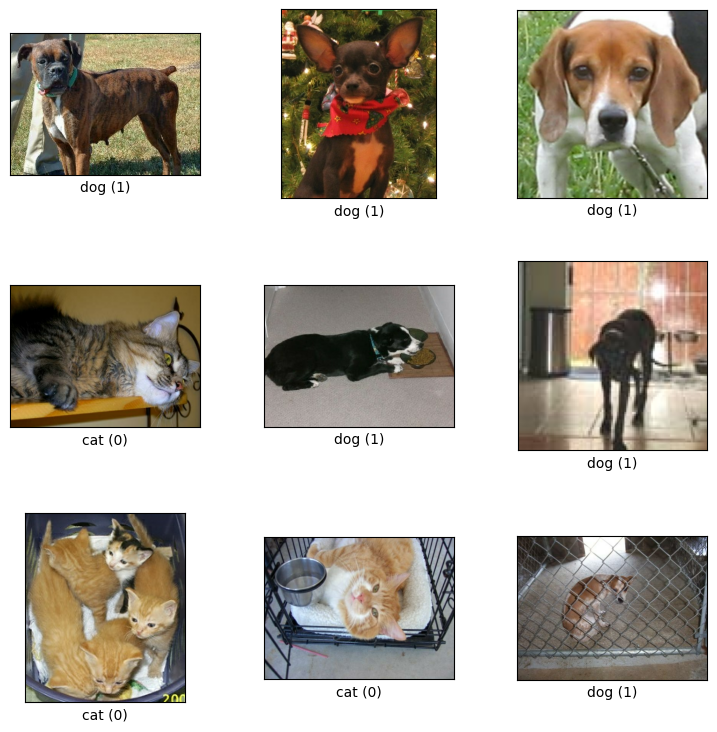

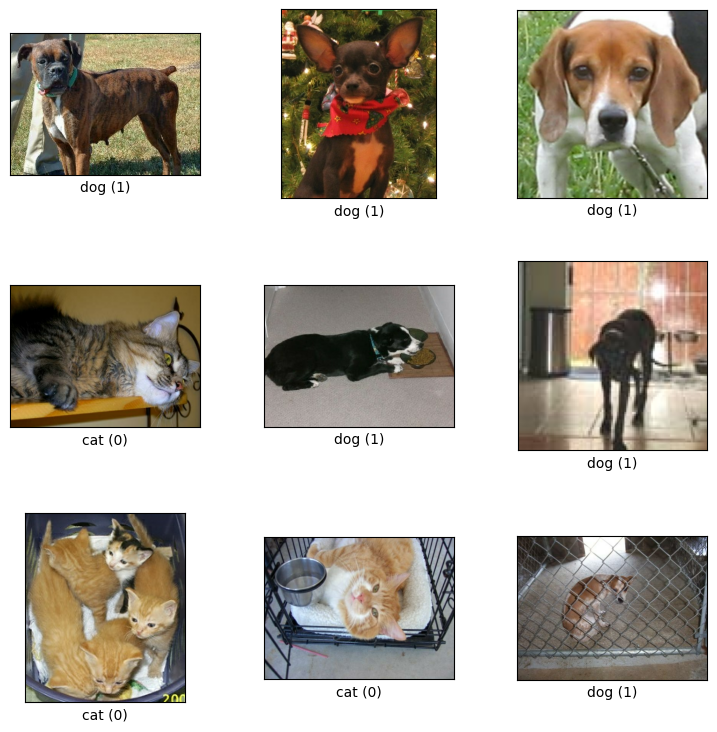

In [ ]:
dataset, info = tfds.load('cats_vs_dogs',
                          split='train',
                          with_info=True,
                          as_supervised=True)
tfds.show_examples(dataset, info)


### Preprocessing

In [ ]:
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

dataset = dataset.map(preprocess).batch(16)


### Załadowanie modelu

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5", trainable=False)
])


In [ ]:
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
imagenet_labels = np.array(open(labels_path).read().splitlines())

### Predykcje

1/1 [==============================] - 3s 3s/step


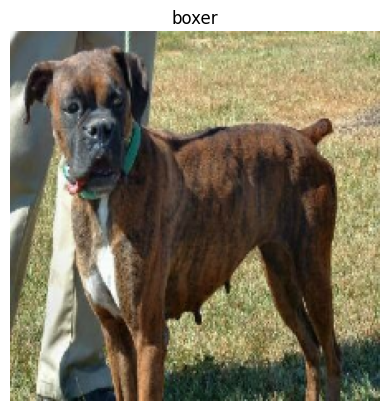

1/1 [==============================] - 3s 3s/step


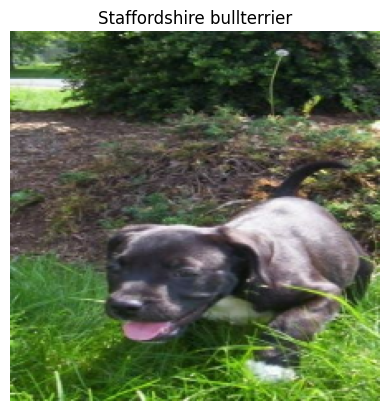

1/1 [==============================] - 2s 2s/step


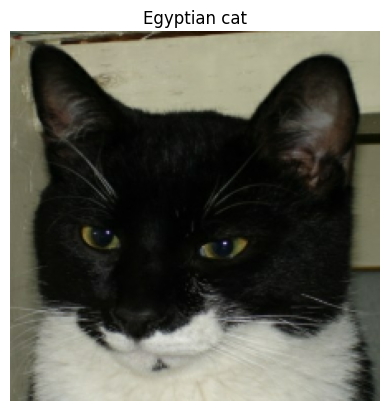

1/1 [==============================] - 3s 3s/step


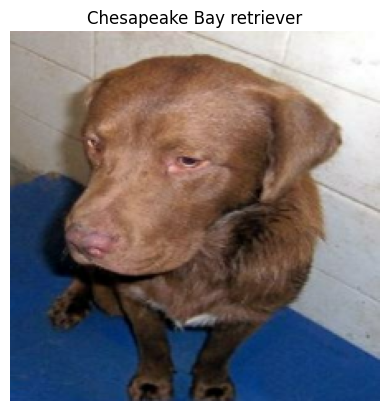

1/1 [==============================] - 2s 2s/step


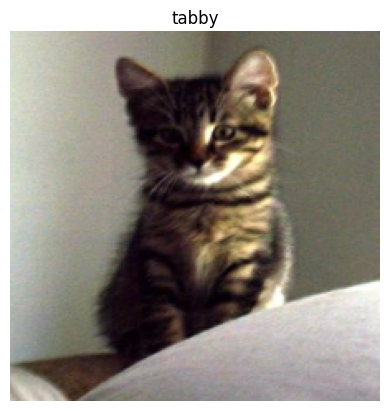

In [ ]:
for images, labels in dataset.take(5):
    pred = model.predict(images)
    pred_id = tf.argmax(pred, axis=-1).numpy()[0]
    plt.imshow(images[0])
    plt.title(imagenet_labels[pred_id])
    plt.axis("off")
    plt.show()

# Zadanie 2 (dodatkowe) ***

Podobnie jak w zadaniu 1 wybierz zbiór danych oraz model dostępny w TensorFlow Hub i przeprowadź operacje **douczania** modelu na tych danych.

Przykładowy schemat działania rozwiązania:
- pobranie danych wizyjnych do klasyfikacji,
- pobranie modelu do **embeddingu obrazów** (tzw. feature vector),
- utworzenie modelu który pobiera feature vectors i wykonuje klasyfikację,
- wykonanie pętli uczenia dla nowo utworzonego modelu

### Wczytanie danych z podziałem

### Wczytanie danych

Wybrano jedynie 1000 zdjęć z oryginalnego zbioru danych, aby przyspieszyć uczenie modelu.

In [ ]:
(train, validation), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:800]", "train[800:1000]"],
    as_supervised=True,
    with_info=True
)

### Preprocesing

In [ ]:
IMG_SIZE = 224

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224)) / 255.0
    return image, label

train_ds = train.map(preprocess).shuffle(1000).batch(32).prefetch(1)
val_ds = validation.map(preprocess).batch(32).prefetch(1)


### pobranie modelu do **embeddingu obrazów**


In [ ]:
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/5",
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    trainable=False
)

### Utworzenie modelu

In [ ]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

### Trening

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
25/25 [==============================] - 181s 7s/step - loss: 0.2250 - accuracy: 0.9200 - val_loss: 0.0996 - val_accuracy: 0.9700
Epoch 2/3
25/25 [==============================] - 181s 7s/step - loss: 0.0424 - accuracy: 0.9925 - val_loss: 0.0852 - val_accuracy: 0.9750
Epoch 3/3
25/25 [==============================] - 171s 7s/step - loss: 0.0265 - accuracy: 0.9950 - val_loss: 0.0779 - val_accuracy: 0.9750
